# ЛР3 ИУ5-62Б Ковалев Сергей

### Импортируем библиотеки

In [15]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")


### Отрисовка ROC-кривой
    

In [16]:
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Разделение выборки на обучающую и тестовую

In [71]:
def split(filehandler, delimiter=';', row_limit=3500,
          output_name_template='wine%s.csv', output_path='.', keep_headers=True):
    import csv
    reader = csv.reader(filehandler, delimiter=delimiter)
    current_piece = 1
    current_out_path = os.path.join(
        output_path,
        output_name_template % current_piece
    )
    current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
    current_limit = row_limit
    if keep_headers:
        headers = next(reader)
        current_out_writer.writerow(headers)
    for i, row in enumerate(reader):
        if i + 1 > current_limit:
            current_piece += 1
            current_limit = row_limit * current_piece
            current_out_path = os.path.join(
                output_path,
                output_name_template % current_piece
            )
            current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
            if keep_headers:
                current_out_writer.writerow(headers)
        current_out_writer.writerow(row)

In [72]:
split(open('/Users/set27/Downloads/winequality-red — копия 2.csv', 'r'));

In [73]:
os.rename('/Users/set27/Downloads/winequality-red — копия 3.csv', '/Users/set27/Downloads/norway_new_car_sales_by_make — копияTrain.csv')
os.rename('/Users/set27/Downloads/winequality-red — копия 4.csv', '/Users/set27/Downloads/norway_new_car_sales_by_make — копияTest.csv')

In [74]:
# Обучающая выборка:
train = pd.read_csv('/Users/set27/Downloads/norway_new_car_sales_by_make — копияTrain.csv', sep=",")
# Тестовая выборка:
test = pd.read_csv('/Users/set27/Downloads/norway_new_car_sales_by_make — копияTest.csv', sep=",")

 ### Проверим правильность создания обучающей и тестовой выборок

In [75]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [76]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Проведение разведочного анализа данных

In [77]:
train.shape, test.shape

((1599, 12), (1599, 12))

***Проверим, одинаковы ли типы данных в столбцах обучающего и тестового датасета:***

In [78]:
train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [79]:
test.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

***Проверяем датасеты на наличие пустых значений:***

In [80]:
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [81]:
test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Уникальные значения целевого признака

In [82]:
train['quality'].unique()

array([5, 6, 7, 4, 8, 3])

###  Распределение целевых значений в обучающей и тестовой выборках

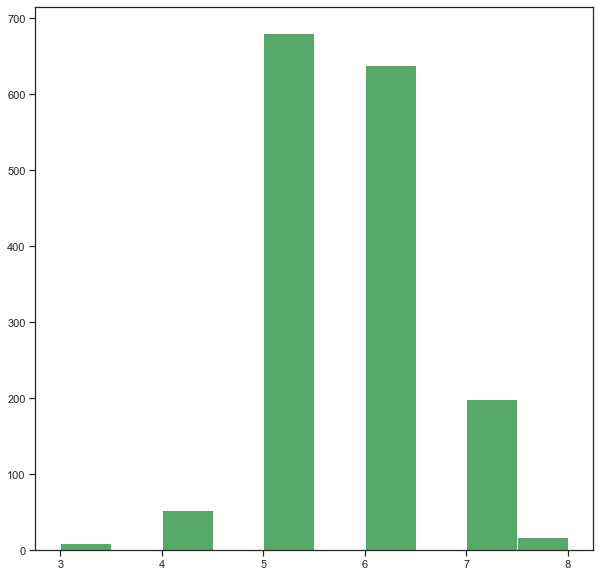

In [83]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.hist(train['quality'], color="g")
plt.show()

***Оценим здесь же плотность вероятности распределения:***

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

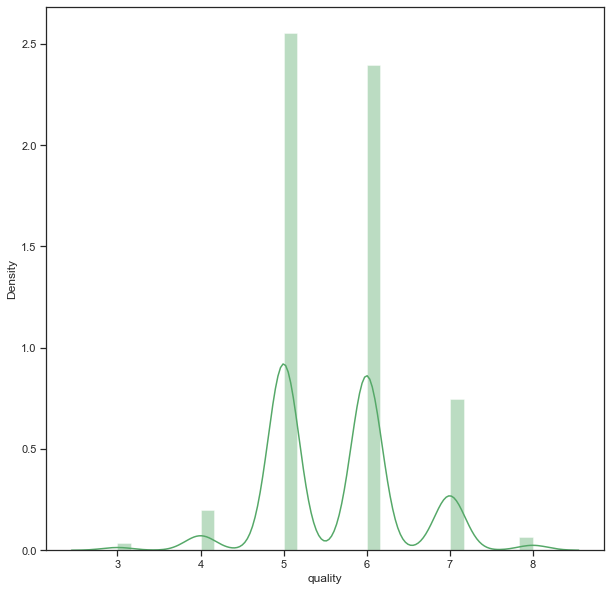

In [84]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(train['quality'], color="g")

### Подсчитаем дисбаланс классов для обучающей выборки

In [85]:
#посчитаем дисбаланс классов
total = train.shape[0]
class_6, class_5, class_7, class_8, class_4, class_3 = train['quality'].value_counts()
print('Класс 3 составляет {}%, \nкласс 4 составляет {}%, \nкласс 5 составляет {}%, \nкласс 6 составляет {}%, \nкласс 7 составляет {}%, \nкласс 8 составляет {}%.'
      .format(round(class_3 / total, 4)*100, 
              round(class_4 / total, 4)*100,
              round(class_5 / total, 4)*100,
              round(class_6 / total, 4)*100,
              round(class_7 / total, 4)*100,
              round(class_8 / total, 4)*100,))

Класс 3 составляет 0.63%, 
класс 4 составляет 1.13%, 
класс 5 составляет 39.900000000000006%, 
класс 6 составляет 42.59%, 
класс 7 составляет 12.45%, 
класс 8 составляет 3.3099999999999996%.


In [86]:
train['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Подсчитаем дисбаланс классов для тестовой выборки

In [87]:
#посчитаем дисбаланс классов для тестовой выборки 
total = train.shape[0]
class_6, class_5, class_7, class_8, class_4, class_3 = train['quality'].value_counts()
print('Класс 3 составляет {}%, \nкласс 4 составляет {}%, \nкласс 5 составляет {}%, \nкласс 6 составляет {}%, \nкласс 7 составляет {}%, \nкласс 8 составляет {}%.'
      .format(round(class_3 / total, 4)*100, 
              round(class_4 / total, 4)*100,
              round(class_5 / total, 4)*100,
              round(class_6 / total, 4)*100,
              round(class_7 / total, 4)*100,
              round(class_8 / total, 4)*100,))

Класс 3 составляет 0.63%, 
класс 4 составляет 1.13%, 
класс 5 составляет 39.900000000000006%, 
класс 6 составляет 42.59%, 
класс 7 составляет 12.45%, 
класс 8 составляет 3.3099999999999996%.


### Распределение классов в тестовой выборке

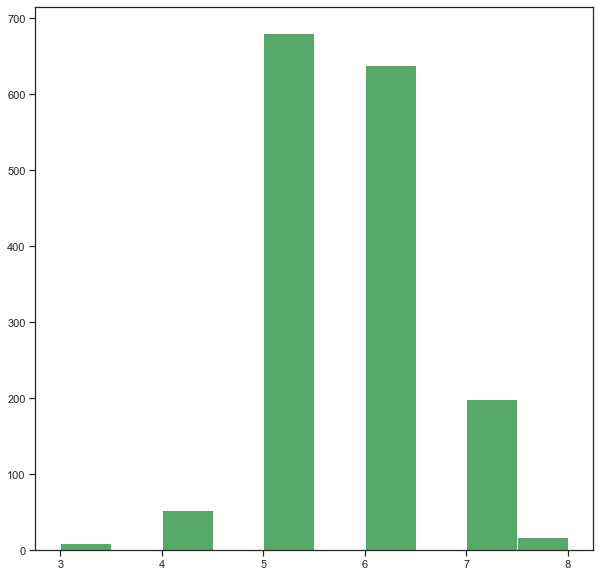

In [88]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.hist(test['quality'], color="g")
plt.show()

### Оценим плотность вероятности распределения

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

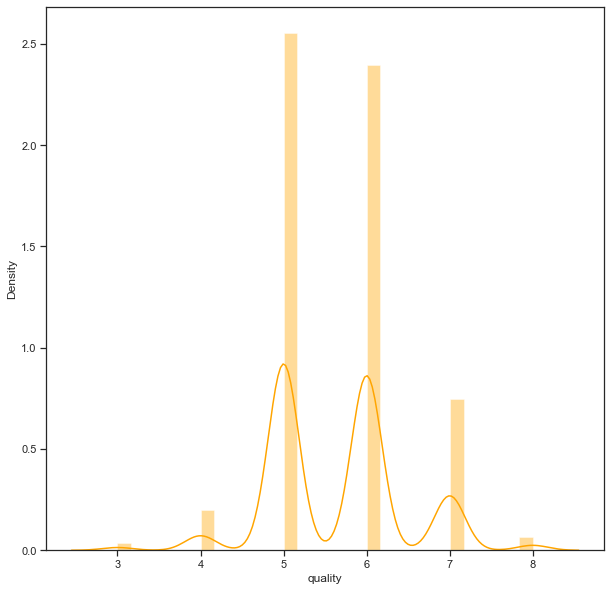

In [89]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(test['quality'], color="orange")

In [90]:
train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [91]:
train['dataset'] = 'TRAIN'
test['dataset'] = 'TEST'

### Выберем столбцы для объединения датасетов

In [92]:
#Колонки для объединения
join_cols = ['dataset', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [93]:
data_all = pd.concat([train[join_cols], test[join_cols]])

### Проверяем корректность объединения

In [94]:
assert data_all.shape[0] == train.shape[0]+test.shape[0]

In [95]:
data_all.head()

,dataset,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,TRAIN,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,TRAIN,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,TRAIN,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,TRAIN,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,TRAIN,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Выберем столбцы для масштабирования

In [96]:
# Числовые колонки для масштабирования
scale_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [97]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_all[scale_cols])

### Добавляем масштабированные данные в наш датасет

In [98]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_all[new_col_name] = sc1_data[:,i]

### Проверяем корректность

In [99]:
data_all.head()

,dataset,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,volatile acidity_scaled,citric acid_scaled,residual sugar_scaled,chlorides_scaled,free sulfur dioxide_scaled,total sulfur dioxide_scaled,density_scaled,pH_scaled,sulphates_scaled,alcohol_scaled
0,TRAIN,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,TRAIN,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,...,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,TRAIN,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,...,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,TRAIN,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,...,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,TRAIN,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


### Повлияло ли масштабирование на распределение данных

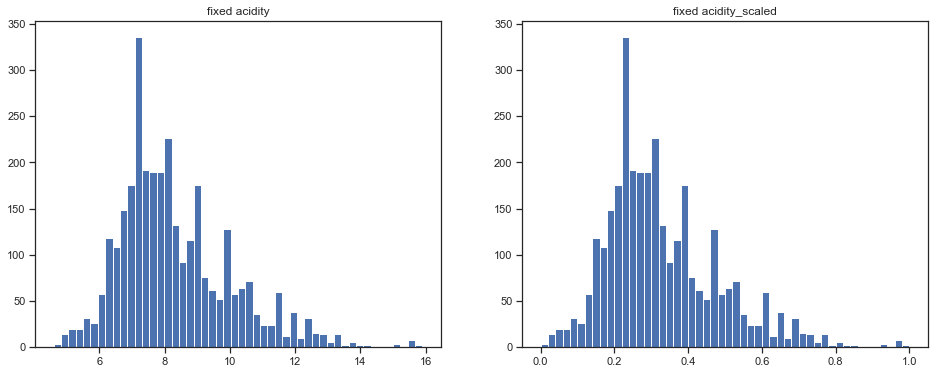

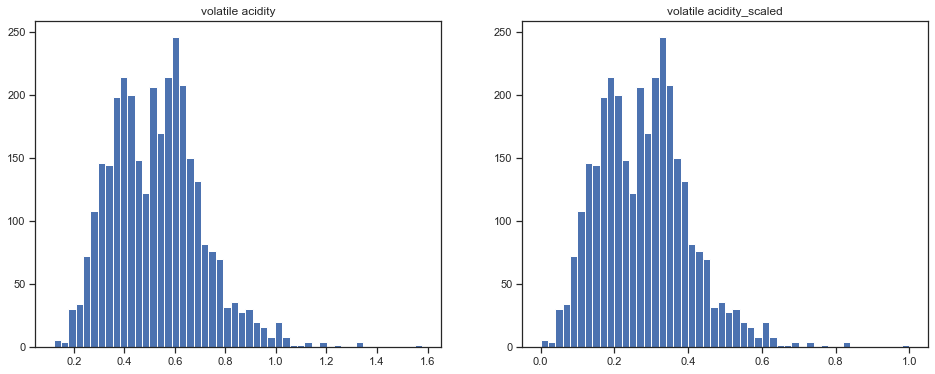

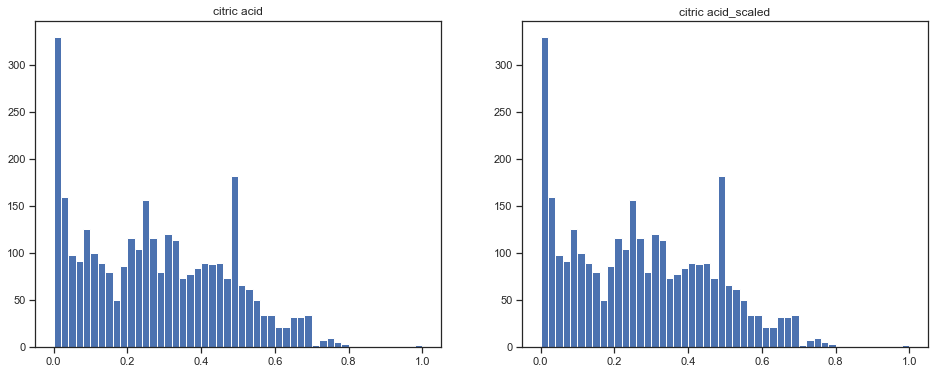

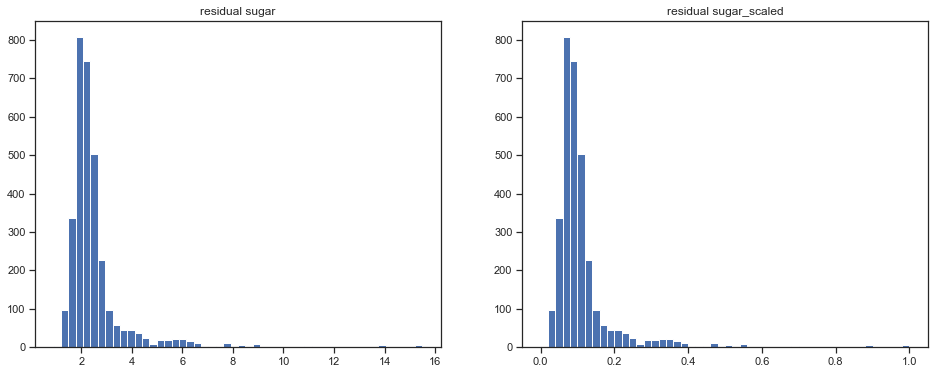

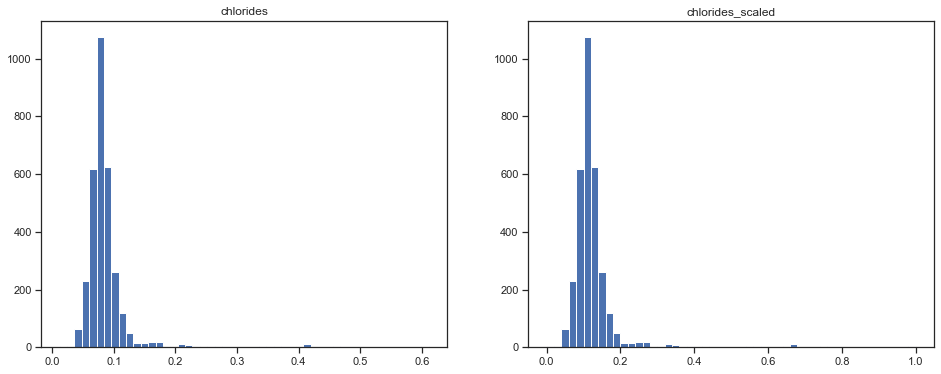

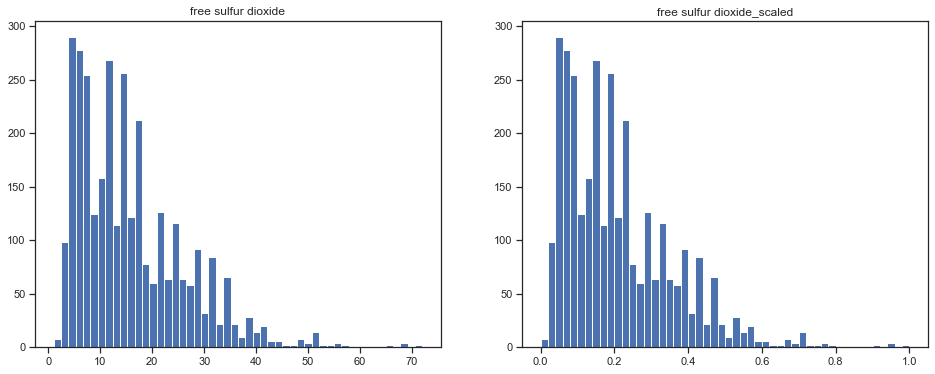

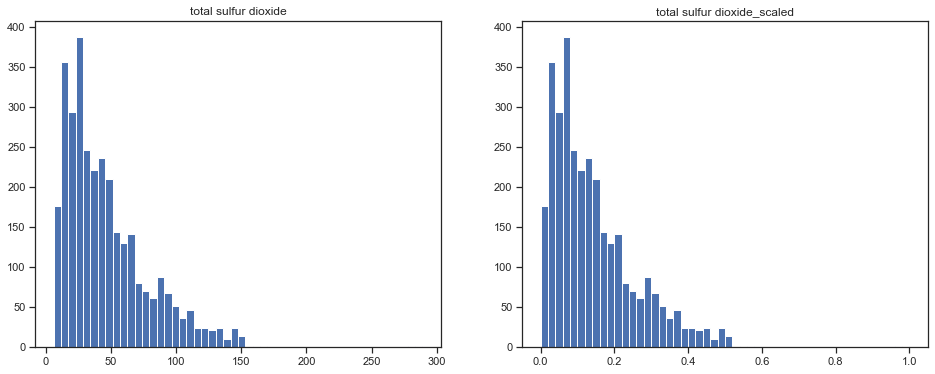

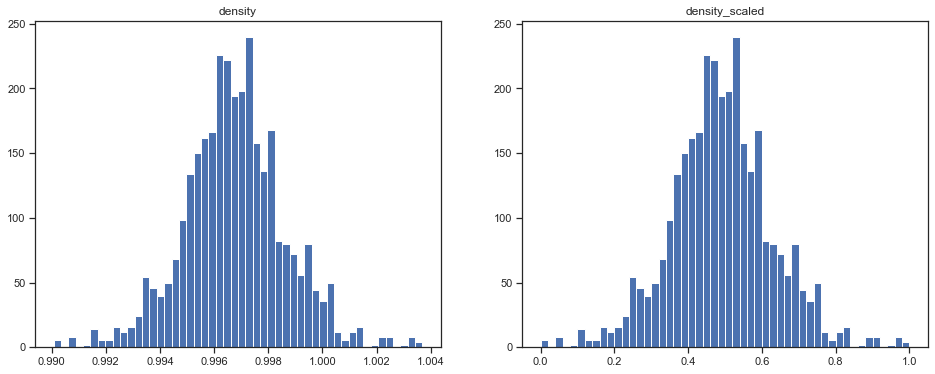

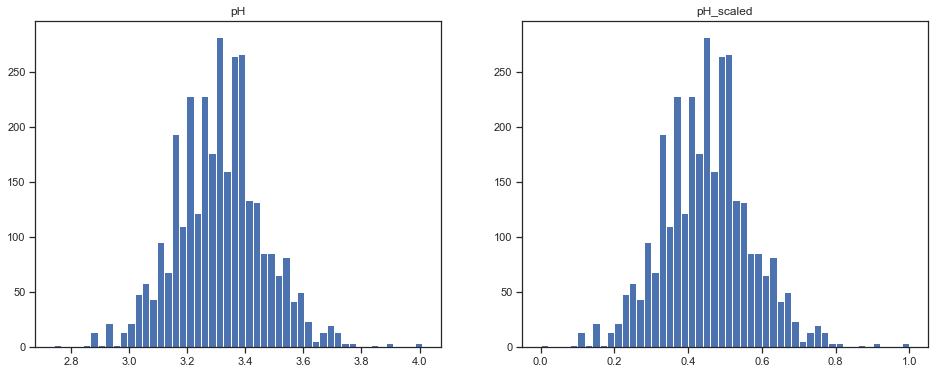

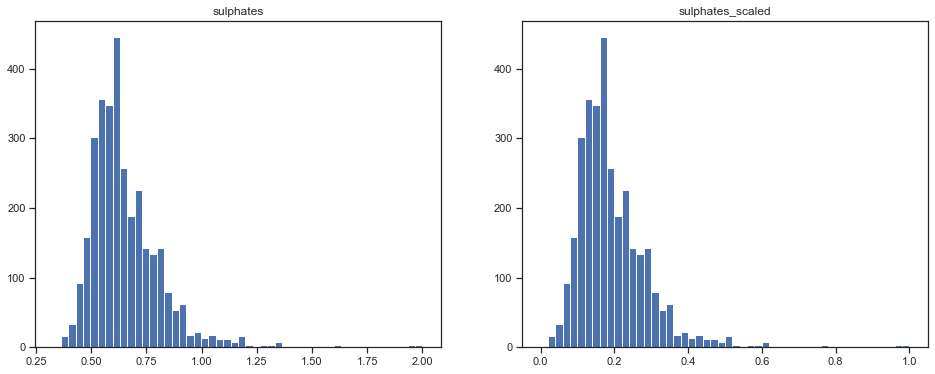

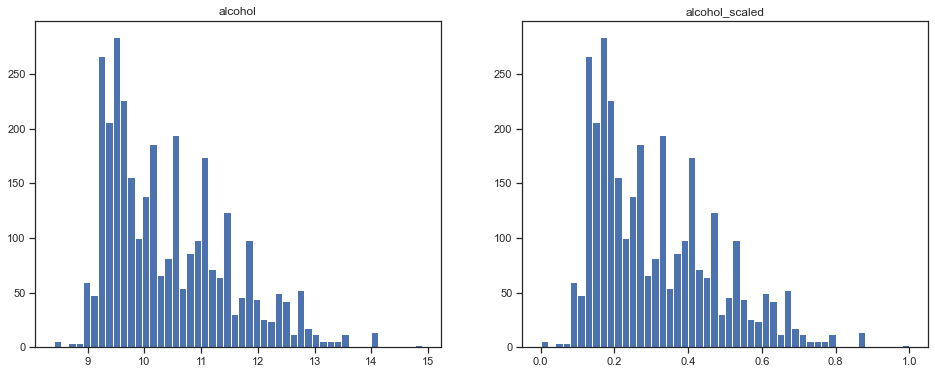

In [100]:
for col in scale_cols:
    col_scaled = col + '_scaled'
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].hist(data_all[col], 50)
    ax[1].hist(data_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

Mасштабирование данных не повлияло на их распределение

### Включим тестовую выборку в корреляционную матрицу

In [101]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['quality']
corr_cols_2

['fixed acidity_scaled',
 'volatile acidity_scaled',
 'citric acid_scaled',
 'residual sugar_scaled',
 'chlorides_scaled',
 'free sulfur dioxide_scaled',
 'total sulfur dioxide_scaled',
 'density_scaled',
 'pH_scaled',
 'sulphates_scaled',
 'alcohol_scaled',
 'quality']

### Построим корреляционную матрицу

<AxesSubplot:>

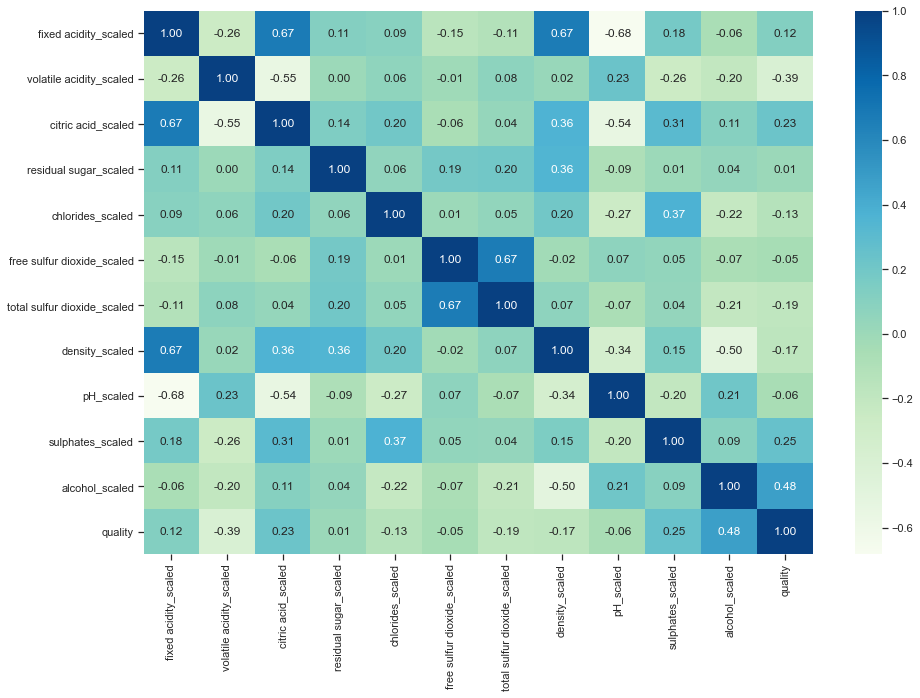

In [102]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_all[corr_cols_2].corr(), annot=True, fmt='.2f', cmap="GnBu")

Корреляционные матрицы для исходных и масштабированных данных полностью совпадают

In [103]:
qual = pd.concat([train['quality'], test['quality']])

In [104]:
def code_myohe(data, column):
    for i in data[column].unique():
        data[column + '=' + str(i)] = (data[column] == i).astype(int)

In [105]:
code_myohe(data_all, 'quality')
data_all.head()

,dataset,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,density_scaled,pH_scaled,sulphates_scaled,alcohol_scaled,quality=5,quality=6,quality=7,quality=4,quality=8,quality=3
0,TRAIN,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,0.567548,0.606299,0.137725,0.153846,1,0,0,0,0,0
1,TRAIN,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,...,0.494126,0.362205,0.209581,0.215385,1,0,0,0,0,0
2,TRAIN,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,...,0.508811,0.409449,0.191617,0.215385,1,0,0,0,0,0
3,TRAIN,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,...,0.582232,0.330709,0.149701,0.215385,0,1,0,0,0,0
4,TRAIN,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,0.567548,0.606299,0.137725,0.153846,1,0,0,0,0,0


In [106]:
data_all['quality'] = qual

### Введем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества

In [107]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='blue')
        plt.show()

## Формирование обучающей и тестовой выборок на основе исходного набора данных.
### Выделим обучающую и тестовую выборки на основе масштабированных данных с помощью фильтра

In [108]:
train_data_all = data_all[data_all['dataset']=='TRAIN']
test_data_all = data_all[data_all['dataset']=='TEST']
train_data_all.shape, test_data_all.shape

((1599, 30), (1599, 30))

### Определим признаки для задачи классификации

In [109]:
# Признаки для задачи классификации
task_clas_cols = ['fixed acidity_scaled', 'volatile acidity_scaled', 'citric acid_scaled', 'residual sugar_scaled',
       'chlorides_scaled', 'total sulfur dioxide_scaled',
       'pH_scaled', 'sulphates_scaled', 'alcohol_scaled']

### Определим выборки для задачи классификации

In [125]:
# Выборки для задачи классификации
clas_X_train = train_data_all[task_clas_cols]
clas_X_test = test_data_all[task_clas_cols]

clas_Y6_train = train_data_all['quality=6']
clas_Y6_test = test_data_all['quality=6']

clas_Y7_train = train_data_all['quality=7']
clas_Y7_test = test_data_all['quality=7']

clas_X_train.shape, clas_X_test.shape, clas_Y6_train.shape, clas_Y6_test.shape

((1599, 9), (1599, 9), (1599,), (1599,))

### Построение базового решения 


#### Определим модель

In [111]:
clas_models = { 'KNN_5':KNeighborsClassifier(n_neighbors=5)}

#### Сохранение метрик

In [112]:
clasMetricLogger = MetricLogger()

In [113]:
def clas_train_model7(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y7_train)
    Y_pred = model.predict(clas_X_test)
    precision = precision_score(clas_Y7_test.values, Y_pred)
    recall = recall_score(clas_Y7_test.values, Y_pred)
    f1 = f1_score(clas_Y7_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y7_test.values, Y_pred)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(clas_Y7_test.values, Y_pred)
    
    plot_confusion_matrix(model, clas_X_test, clas_Y7_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
KNeighborsClassifier()
*****************************************************


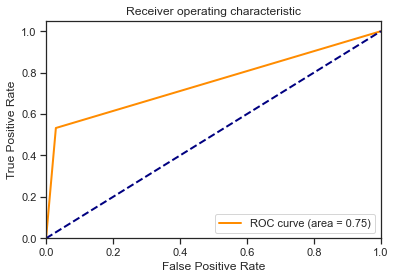

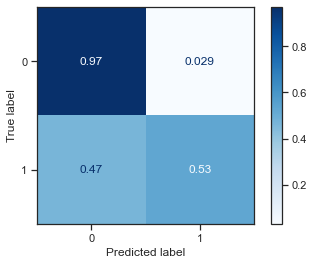

In [114]:
for model_name, model in clas_models.items():
    clas_train_model7(model_name, model, clasMetricLogger)

## Подбор гиперпараметров 

In [115]:
clas_X_train.shape

(1599, 9)

In [116]:
n_range = np.array(range(1,170,3))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,
          40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,
          79,  82,  85,  88,  91,  94,  97, 100, 103, 106, 109, 112, 115,
         118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154,
         157, 160, 163, 166, 169])}]

In [117]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=6, scoring='roc_auc')
clf_gs.fit(clas_X_train, clas_Y7_train)

CPU times: user 6.05 s, sys: 121 ms, total: 6.18 s
Wall time: 6.89 s


GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,
        40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,
        79,  82,  85,  88,  91,  94,  97, 100, 103, 106, 109, 112, 115,
       118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154,
       157, 160, 163, 166, 169])}],
             scoring='roc_auc')

### Лучшая модель

In [118]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=142)

### Лучшее значение параметров

In [119]:
clf_gs.best_params_

{'n_neighbors': 142}

### Изменение качества на тестовой выборке в зависимости от К-соседей

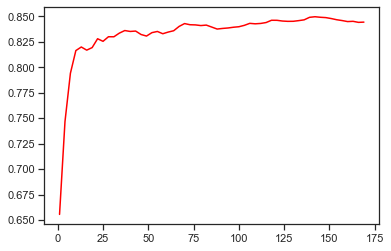

In [120]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'], color="red")

## Сравнение качества полученных моделей с качеством baseline-моделей.


In [121]:
clas_models_grid = {'KNN_160':clf_gs.best_estimator_}

*****************************************************
KNeighborsClassifier(n_neighbors=142)
*****************************************************


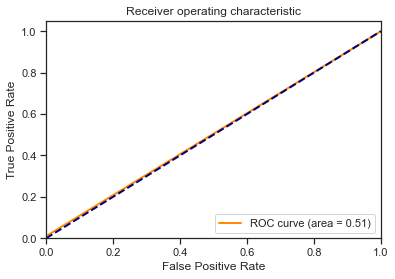

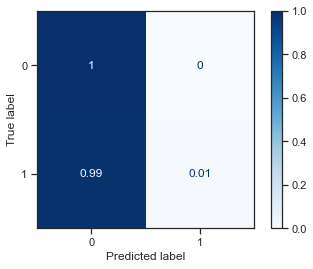

In [122]:
for model_name, model in clas_models_grid.items():
    clas_train_model7(model_name, model, clasMetricLogger)

## Формирование выводов о качестве построенных моделей на основе выбранных метрик


### Метрики качества модели

In [123]:
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

### Графики метрик качества модели

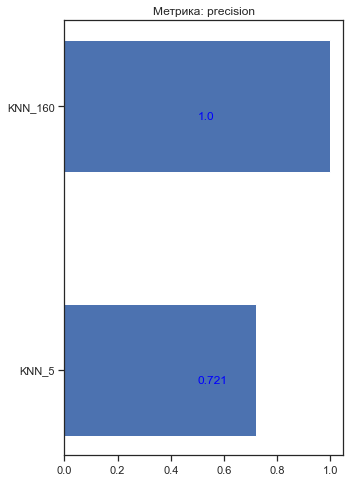

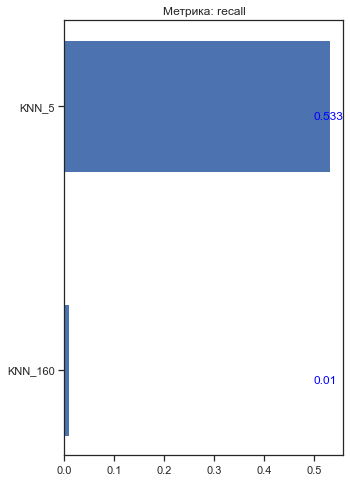

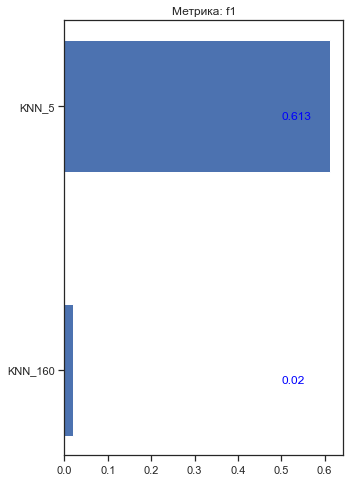

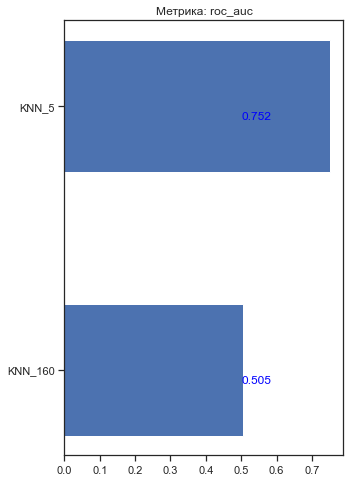

In [124]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(5, 8))

### Вывод  

Без гиперпараметров точность расчетов оказалась точнее. 